In [38]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [32]:
smp_df = pickle.load(open('/home/robbie/Dropbox/smp/SMP_summary_df.p','rb'))

smp_df.set_index('timestamp',inplace=True)
smp_df.sort_index(inplace=True)
smp_df = smp_df[~np.isnan(smp_df['longitude'])]
# smp_df = smp_df.resample('1D').mean()
# smp_df = smp_df.interpolate(method='linear')

smp_df = smp_df[smp_df.index.month==9]

smp_df

,filename,mean_density,mean_ssa,median_density,median_ssa,snowpit_depth,latitude,longitude
timestamp,,,,,,,,
2020-09-05 05:02:41,S31H1198.pnt,154.413010,43.619245,155.948483,43.328349,8.545459,88.748184,119.438774
2020-09-05 05:03:26,S31H1198.pnt,197.595378,39.463872,147.924330,44.581200,9.258269,88.748169,119.437973
2020-09-05 05:04:19,S31H1198.pnt,159.031790,12.378151,174.199358,5.656755,26.314053,88.748169,119.437958
2020-09-05 05:04:53,S31H1198.pnt,184.658483,10.986923,203.616275,5.636484,33.845045,88.748169,119.437050
2020-09-05 05:05:26,S31H1198.pnt,204.886018,12.224369,183.219590,5.546814,43.349177,88.748161,119.437363
...,...,...,...,...,...,...,...,...
2020-09-30 13:55:54,S31H1198.pnt,385.393150,7.019434,425.119569,7.039480,29.506203,81.685669,1.355165
2020-09-30 14:04:51,S31H1198.pnt,NaN,NaN,NaN,NaN,NaN,81.684570,1.348882
2020-09-30 14:06:38,S31H1198.pnt,NaN,NaN,NaN,NaN,NaN,81.684372,1.347845


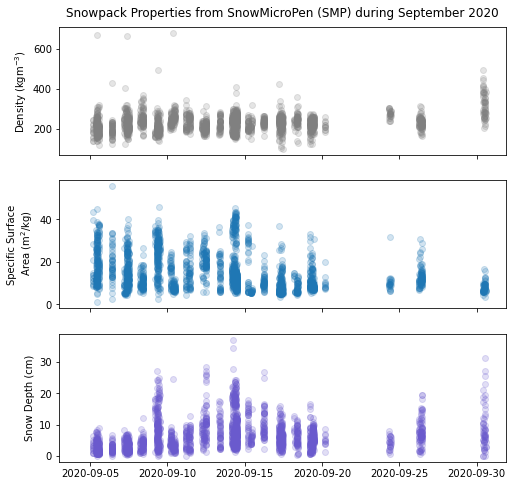

In [63]:
fig, axs = plt.subplots(3,1,figsize=(8,8))

ax1, ax2, ax3 = axs.reshape(-1)

alpha= 0.2

ax1.scatter(smp_df.index, smp_df['mean_density'],alpha=alpha,color='gray')
ax1.set_ylabel('Density (kgm$^{-3}$)')

ax2.scatter(smp_df.index, smp_df['mean_ssa'],alpha=alpha)
ax2.set_ylabel('Specific Surface\n Area (m$^{2}$/kg)')

ax3.scatter(smp_df.index, smp_df['snowpit_depth']/10,alpha=alpha,color='slateblue')
ax3.set_ylabel('Snow Depth (cm)')

date_ticks = [datetime.date(year=2020,month=9,day=1) + datetime.timedelta(days=x) for x in range(4,31,5) ]

for ax in axs:
    ax.set_xticks(date_ticks)
    ax.set_xlim(datetime.date(year=2020,month=9,day=3))

for ax in [ax1,ax2]:
    ax.set_xticklabels([])
    
ax1.set_title('Snowpack Properties from SnowMicroPen (SMP) during September 2020', pad=10)

plt.savefig(f'smp_multiplot.jpg',bbox_inches='tight',dpi=500)

plt.show()